In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

from pathlib import Path
import sys

notebook_dir = Path().resolve()
common_utils_path = notebook_dir.parent / "common_utils"
sys.path.append(str(common_utils_path))

from EDA import dataset_overview,categorical_analysis,num_analysis

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
df_og = X
df_og['Rings'] = y
df_og['id'] = 0

In [3]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_final = pd.read_csv('data/sample_submission.csv')

In [4]:
df_og.head(3)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,id
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,0


In [5]:
df.head(3)

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.240,11
1,1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.320,11
2,2,I,0.16,0.11,0.025,0.0210,0.0055,0.0030,0.005,6


In [6]:
df.rename(columns={'Whole weight':'Whole_weight', 'Whole weight.1': 'Shucked_weight', 'Whole weight.2': 'Viscera_weight', 'Shell weight' : 'Shell_weight'}, inplace=True)
df_test.rename(columns={'Whole weight':'Whole_weight', 'Whole weight.1': 'Shucked_weight', 'Whole weight.2': 'Viscera_weight', 'Shell weight' : 'Shell_weight'}, inplace=True)

In [7]:
df = pd.concat([df,df_og],axis=0)


In [8]:
num_cols, cat_cols = dataset_overview(df)

==================================== Dataset Overview ====================================

============ Data Shape ============
Rows: 94792
Columns: 10


============ Datatypes ============
<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              94792 non-null  int64  
 1   Sex             94792 non-null  object 
 2   Length          94792 non-null  float64
 3   Diameter        94792 non-null  float64
 4   Height          94792 non-null  float64
 5   Whole_weight    94792 non-null  float64
 6   Shucked_weight  94792 non-null  float64
 7   Viscera_weight  94792 non-null  float64
 8   Shell_weight    94792 non-null  float64
 9   Rings           94792 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 8.0+ MB
============ Missing Values ============


id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64



============ Duplicates Values ============
Duplicated values : 0
============ Data Preview ============
Head:


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,F,0.55,0.43,0.150,0.7715,0.3285,0.1465,0.240,11
1,1,F,0.63,0.49,0.145,1.1300,0.4580,0.2765,0.320,11
2,2,I,0.16,0.11,0.025,0.0210,0.0055,0.0030,0.005,6


Tail:


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4174,0,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.308,9
4175,0,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.296,10
4176,0,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.495,12


Sample:


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
39530,39530,I,0.580,0.425,0.135,0.8690,0.3295,0.1715,0.270,11
30818,30818,M,0.565,0.450,0.170,0.9660,0.3210,0.1495,0.340,16
44718,44718,I,0.190,0.130,0.045,0.0275,0.0090,0.0050,0.009,4




============ Numerical and Categorical Values ============
Numerical Datatypes: Index(['id', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')
Number of numeric features: 9
Categorical Datatypes: Index(['Sex'], dtype='object')
Number of categorical features: 1


# Observations
1. There are 7 numeric (1 id column and 1 target feature) features and 1 categorical feature
2. No missing values or duplicated values
3. 90615 rows of data

In [9]:
num_cols_to_analyze = num_cols.drop('id')

****************************** Length analysis ******************************


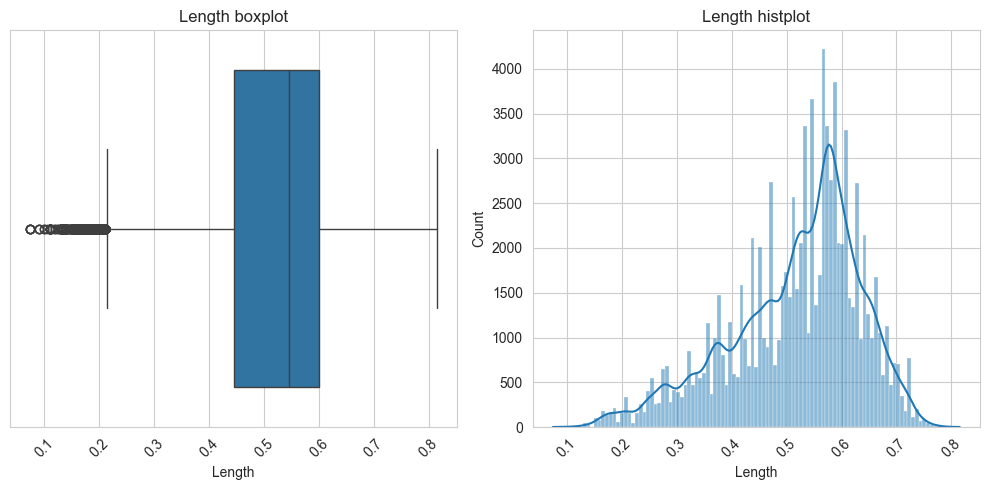

********************  Length values description  ********************


,Length
count,94792.000000
mean,0.517402
std,0.118308
min,0.075000
25%,0.445000
50%,0.545000
75%,0.600000
max,0.815000


********************  Length outliers  ********************
IQR : 0.15499999999999997
****** Lower Outliers ******
Lower outlier count: 1520


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
2,2,I,0.160,0.11,0.025,0.0210,0.0055,0.0030,0.005,6
8,8,I,0.205,0.15,0.040,0.0460,0.0145,0.0105,0.010,4
28,28,I,0.180,0.11,0.040,0.0315,0.0105,0.0065,0.005,4






****************************** Diameter analysis ******************************


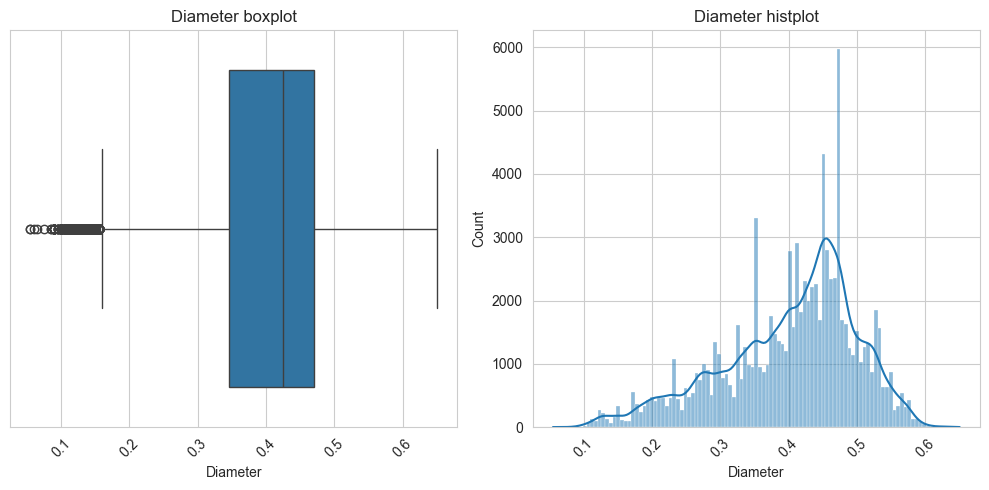

********************  Diameter values description  ********************


,Diameter
count,94792.000000
mean,0.401952
std,0.098088
min,0.055000
25%,0.345000
50%,0.425000
75%,0.470000
max,0.650000


********************  Diameter outliers  ********************
IQR : 0.125
****** Lower Outliers ******
Lower outlier count: 1643


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
2,2,I,0.160,0.11,0.025,0.0210,0.0055,0.0030,0.005,6
8,8,I,0.205,0.15,0.040,0.0460,0.0145,0.0105,0.010,4
28,28,I,0.180,0.11,0.040,0.0315,0.0105,0.0065,0.005,4






****************************** Height analysis ******************************


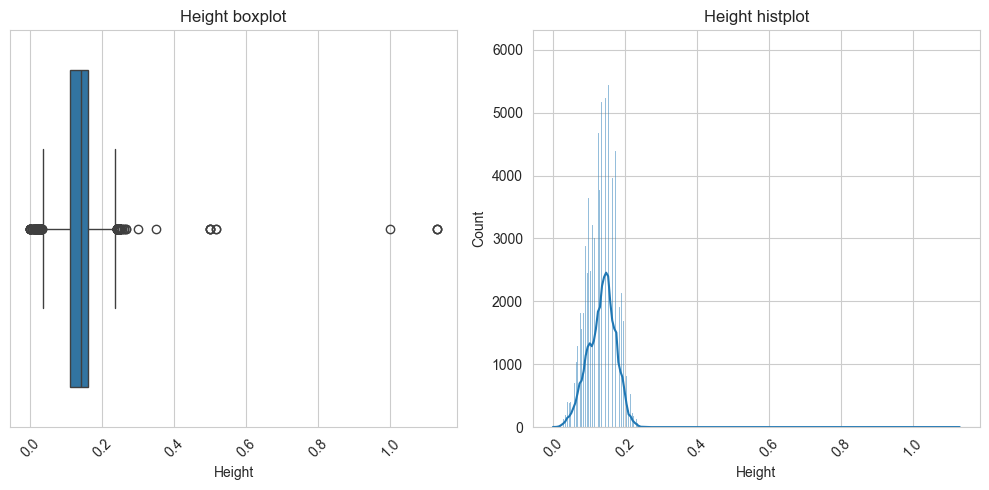

********************  Height values description  ********************


,Height
count,94792.000000
mean,0.135643
std,0.038193
min,0.000000
25%,0.110000
50%,0.140000
75%,0.160000
max,1.130000


********************  Height outliers  ********************
IQR : 0.05
****** Upper Outliers ******
Upper outlier count: 65


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
5556,5556,M,0.735,0.565,0.25,1.7775,0.9615,0.4095,0.4050,11
13565,13565,F,0.675,0.520,0.24,1.8730,0.8690,0.3810,0.4045,10
16384,16384,F,0.515,0.375,1.13,0.5720,0.2370,0.1455,0.1500,8


****** Lower Outliers ******
Lower outlier count: 310


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.005,6
349,349,I,0.155,0.115,0.025,0.0155,0.0065,0.0020,0.005,3
800,800,I,0.185,0.125,0.025,0.0280,0.0095,0.0065,0.009,4






****************************** Whole_weight analysis ******************************


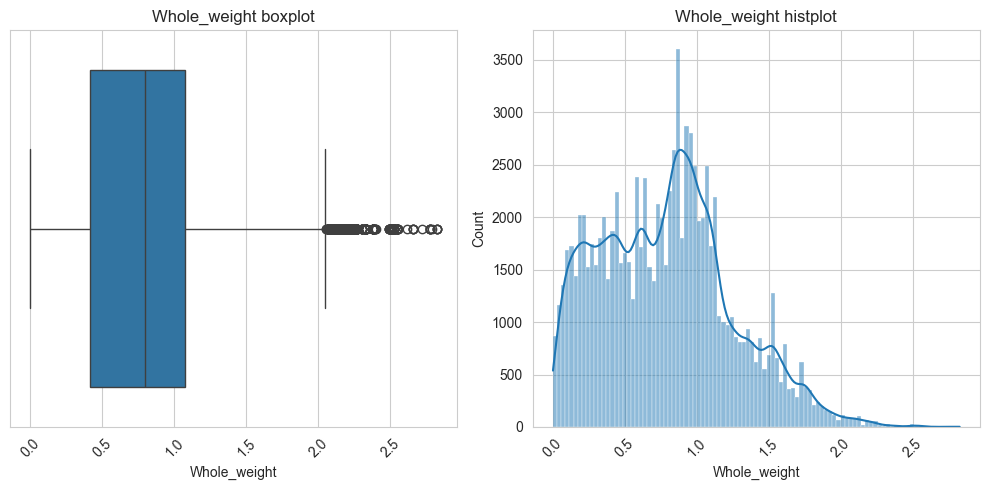

********************  Whole_weight values description  ********************


,Whole_weight
count,94792.000000
mean,0.790785
std,0.459231
min,0.002000
25%,0.419500
50%,0.799500
75%,1.072500
max,2.825500


********************  Whole_weight outliers  ********************
IQR : 0.653
****** Upper Outliers ******
Upper outlier count: 616


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
649,649,M,0.705,0.570,0.225,2.555,0.8155,0.3115,0.560,13
670,670,F,0.720,0.550,0.210,2.069,0.9205,0.3850,0.601,12
942,942,F,0.765,0.585,0.215,2.173,0.8010,0.4985,0.605,11






****************************** Shucked_weight analysis ******************************


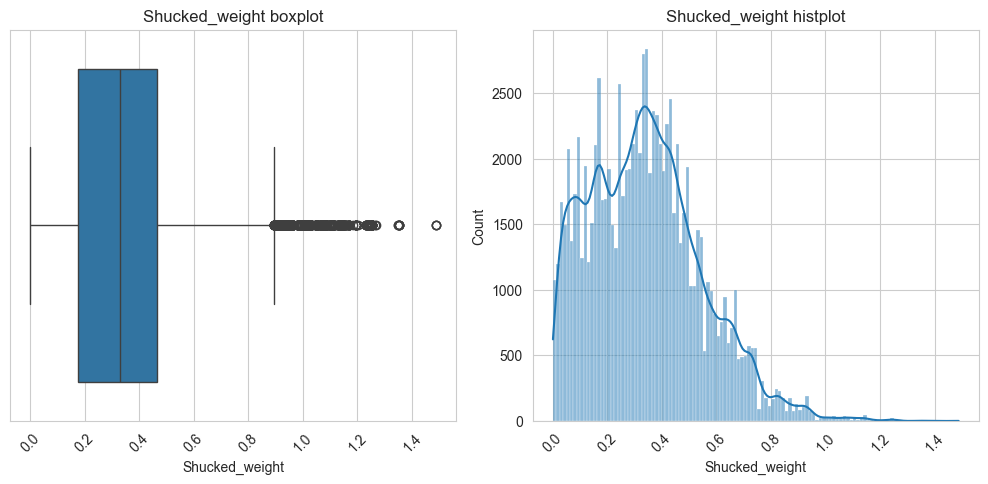

********************  Shucked_weight values description  ********************


,Shucked_weight
count,94792.000000
mean,0.341597
std,0.205267
min,0.001000
25%,0.177500
50%,0.330000
75%,0.464500
max,1.488000


********************  Shucked_weight outliers  ********************
IQR : 0.28700000000000003
****** Upper Outliers ******
Upper outlier count: 1003


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
62,62,M,0.725,0.565,0.205,1.9260,0.9590,0.3800,0.4400,11
150,150,F,0.675,0.530,0.185,1.9485,0.9455,0.3525,0.4500,14
440,440,M,0.710,0.555,0.215,1.9330,0.9155,0.4400,0.6315,13






****************************** Viscera_weight analysis ******************************


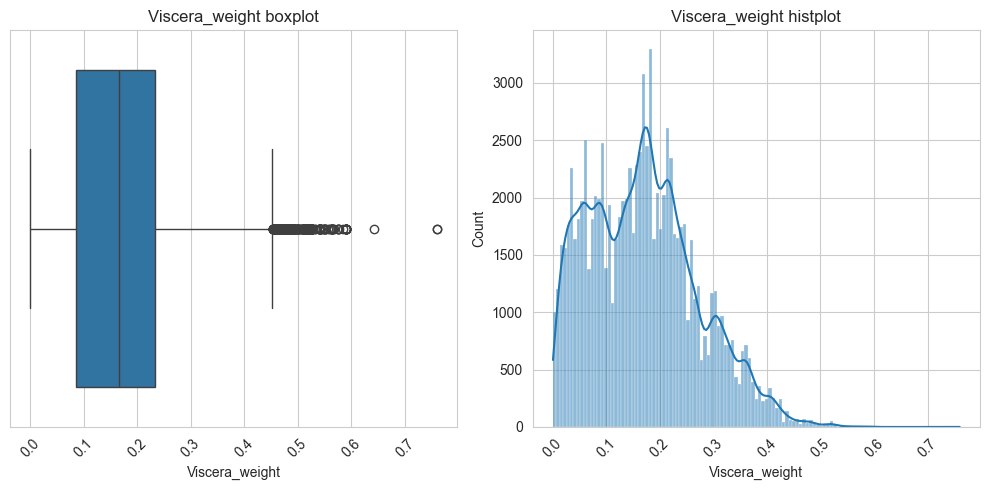

********************  Viscera_weight values description  ********************


,Viscera_weight
count,94792.000000
mean,0.169914
std,0.101334
min,0.000500
25%,0.086500
50%,0.166000
75%,0.233000
max,0.760000


********************  Viscera_weight outliers  ********************
IQR : 0.14650000000000002
****** Upper Outliers ******
Upper outlier count: 494


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
240,240,M,0.710,0.565,0.190,1.9380,0.8835,0.4825,0.5750,11
655,655,F,0.720,0.575,0.210,1.9335,0.9260,0.4575,0.4525,11
942,942,F,0.765,0.585,0.215,2.1730,0.8010,0.4985,0.6050,11






****************************** Shell_weight analysis ******************************


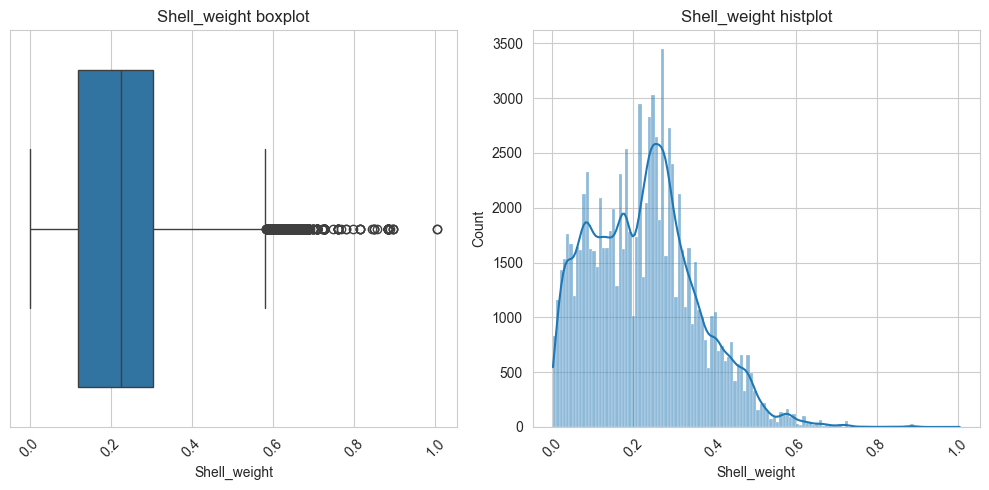

********************  Shell_weight values description  ********************


,Shell_weight
count,94792.000000
mean,0.226468
std,0.130639
min,0.001500
25%,0.120000
50%,0.225000
75%,0.305000
max,1.005000


********************  Shell_weight outliers  ********************
IQR : 0.185
****** Upper Outliers ******
Upper outlier count: 735


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
321,321,F,0.775,0.570,0.205,2.032,0.5800,0.4075,0.6250,20
440,440,M,0.710,0.555,0.215,1.933,0.9155,0.4400,0.6315,13
612,612,M,0.735,0.565,0.230,2.033,0.7510,0.4255,0.6585,12






****************************** Rings analysis ******************************


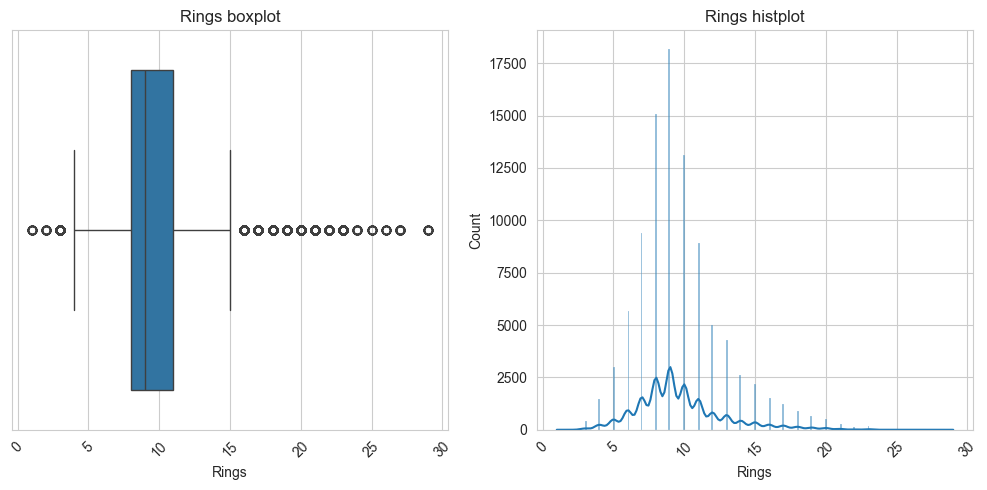

********************  Rings values description  ********************


,Rings
count,94792.000000
mean,9.707233
std,3.178704
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


********************  Rings outliers  ********************
IQR : 3.0
****** Upper Outliers ******
Upper outlier count: 5546


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
27,27,M,0.645,0.525,0.175,1.4890,0.5985,0.3315,0.400,20
29,29,M,0.580,0.450,0.165,1.0425,0.3745,0.2075,0.455,20
37,37,F,0.605,0.475,0.175,1.2415,0.5305,0.3065,0.340,17


****** Lower Outliers ******
Lower outlier count: 457


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
107,107,I,0.205,0.185,0.055,0.0235,0.0075,0.0050,0.0100,3
111,111,I,0.295,0.210,0.075,0.1275,0.0385,0.0185,0.0215,3
349,349,I,0.155,0.115,0.025,0.0155,0.0065,0.0020,0.0050,3


In [10]:
for col in num_cols_to_analyze:
    num_analysis(df,col)

****************************** Sex analysis ******************************
Number of Unique Sex values: 3


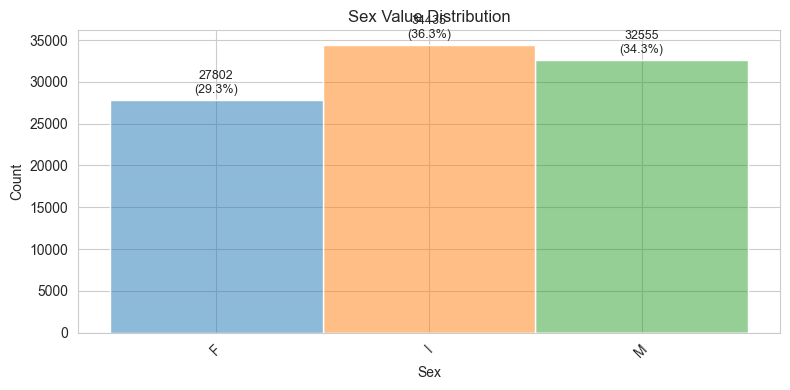

In [11]:
for col in cat_cols:
    categorical_analysis(df,col)

# Observations
1. Lots of outliers but do not appear to be errors
2. Highly skewed data
3. Sex Value should be one-hot-encoded

# Additional Questions
1. How does sex/infancy of the abalone affect weight and number of rings?
2. What is the relationship between all numerical features?
3. At what weight or size do abalones typically mature?
4. Do male or females tend to live longer?
5. What is the relationship between shell weight and age?

In [12]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

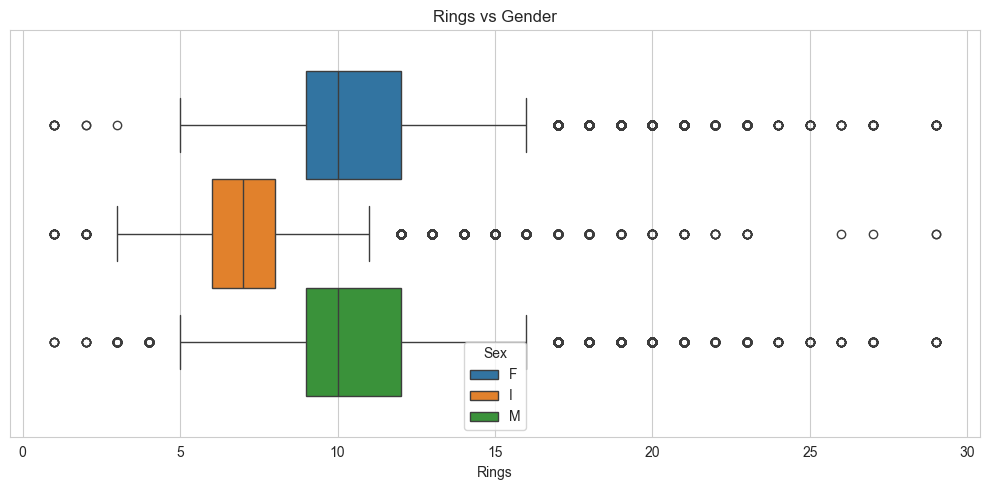

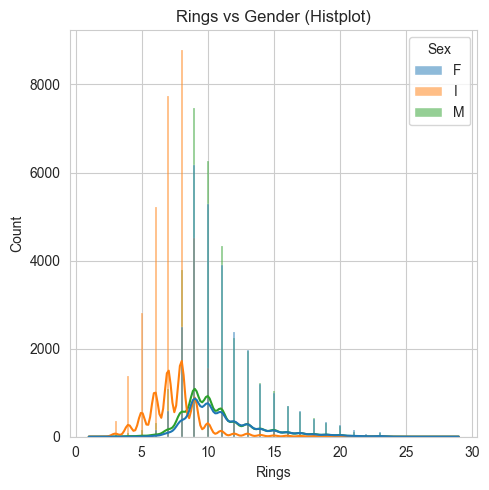

In [13]:
# 1. How does sex/infancy of the abalone affect weight and number of rings?

plt.figure(figsize=(10,5))
plt.title("Rings vs Gender")
sns.boxplot(data=df,x='Rings',hue='Sex')
plt.tight_layout()
plt.show()


plt.figure(figsize=(5,5))
plt.title("Rings vs Gender (Histplot)")
sns.histplot(data=df,x='Rings',hue='Sex',kde=True)
plt.tight_layout()
plt.show()

In [14]:
df.groupby(by='Sex')['Rings'].mean().reset_index()



,Sex,Rings
0,F,11.159881
1,I,7.547466
2,M,10.751160


In [15]:
# Female abalone and male abalone are very similar in terms of age relationship, with females edging slightly ahead
# Infants tend to have significantly less rings, however some outliers are apparent 

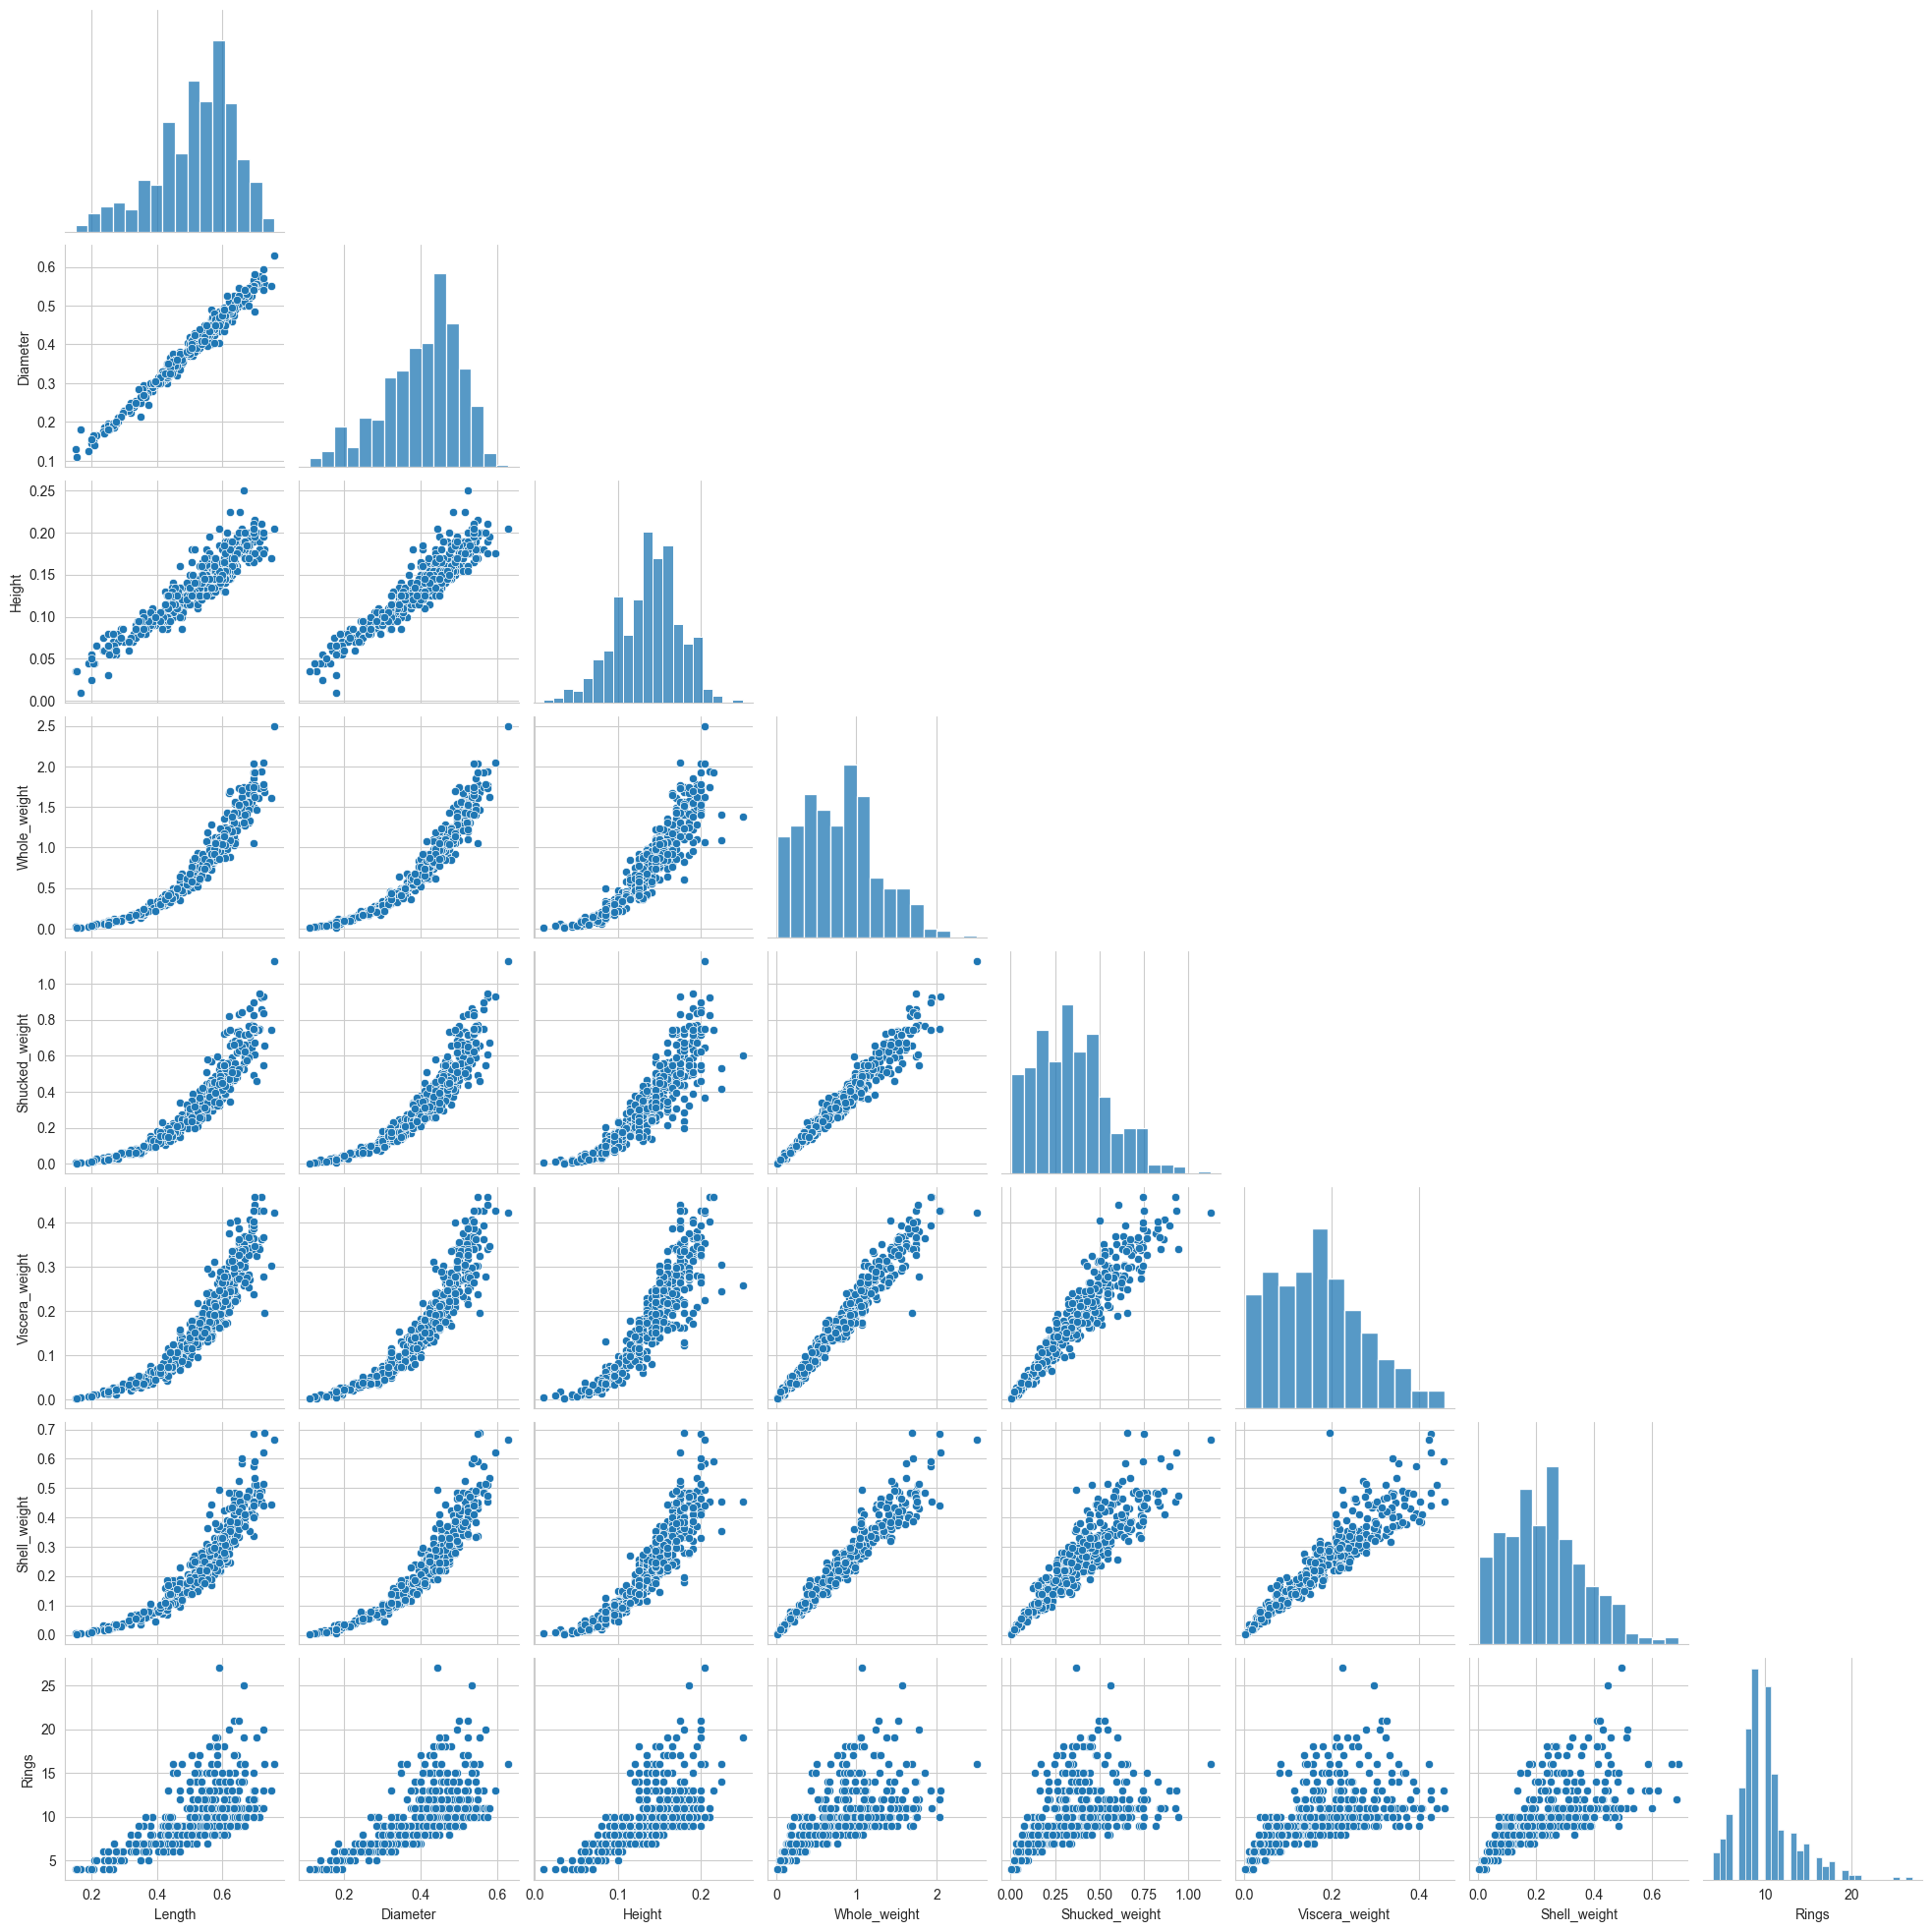

In [16]:
# 2. What is the relationship between all numerical features?

df_sample = df.sample(n=500)
df_sample.drop(columns='id',inplace=True)
sns.pairplot(data=df_sample, corner=True)

<Axes: >

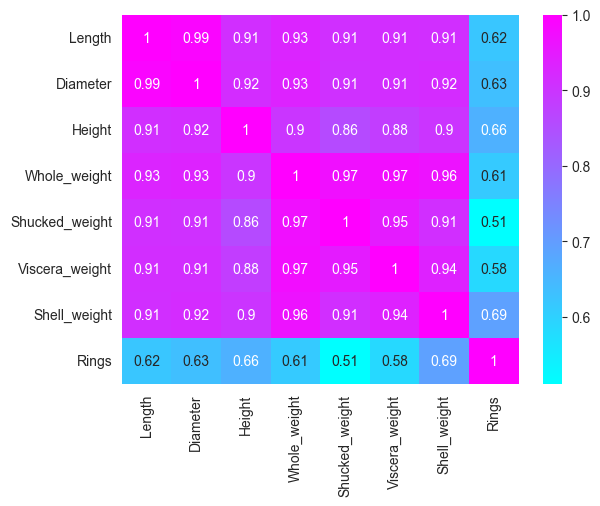

In [17]:
sns.heatmap(df[num_cols_to_analyze].corr(),annot=True, cmap='cool')

In [18]:
# There is significant correlation betweeen all numerical features. This may cause issues with multicollinearity and may require feature engineering
# Rings seem to be positively correlated with each individual feature, likely because each feature describes the size or weight of the abalone

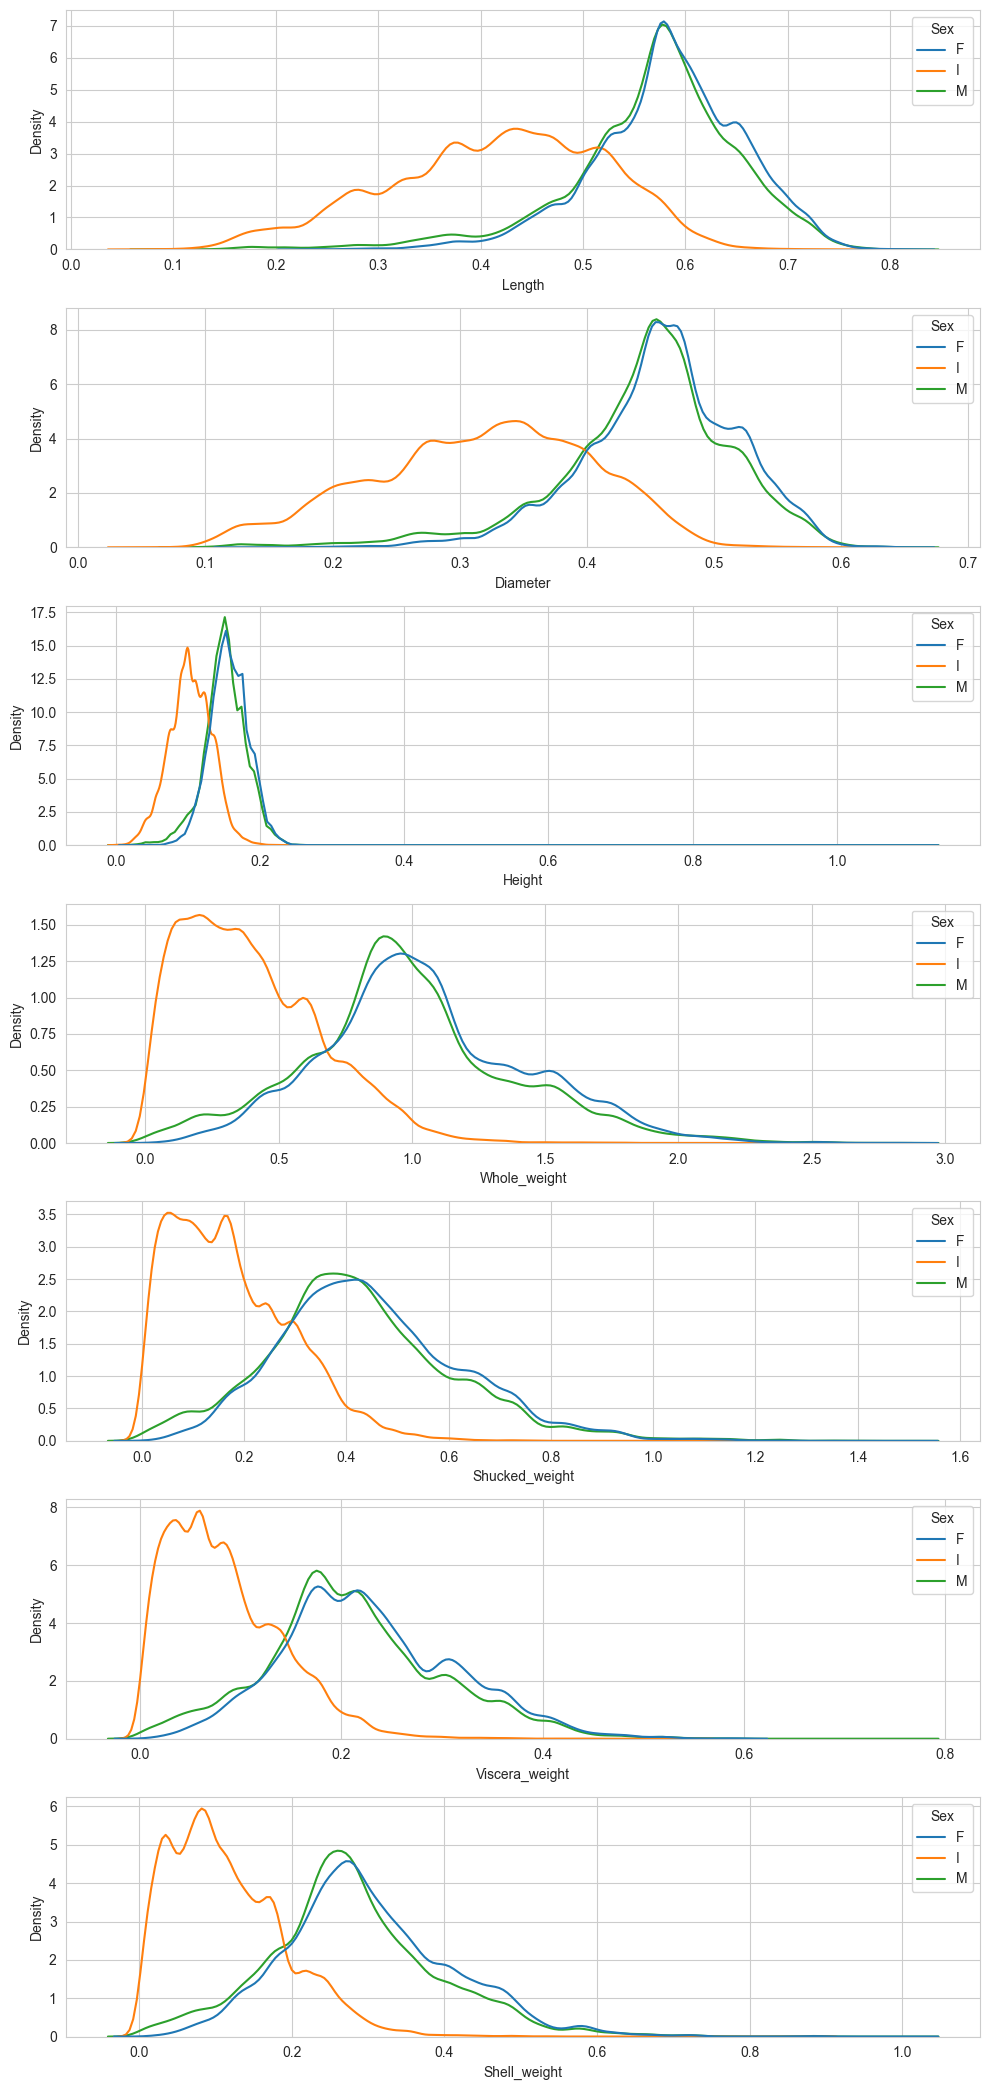

In [19]:
# At what weight or size do abalones typically mature?
# Assuming that abalone mature when they become either male or female, we compare the numerical features with hue by gender

cols = num_cols_to_analyze.drop('Rings')
fig, axs = plt.subplots(nrows=len(cols), figsize=(10, len(cols) * 3))

for i,col in enumerate(cols):
    sns.kdeplot(data=df, x=col, hue='Sex', ax=axs[i],common_norm=False)
    
plt.tight_layout()
plt.show()

In [20]:
df_sex = df.groupby('Sex').median()

display(df_sex.drop(columns='id'))

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Sex,,,,,,,,
F,0.585,0.460,0.155,1.0095,0.4305,0.2185,0.2875,10.0
I,0.425,0.325,0.100,0.3580,0.1575,0.0735,0.1015,7.0
M,0.575,0.450,0.150,0.9555,0.4070,0.2045,0.2700,10.0


C:\Users\JEFF\AppData\Local\Temp\ipykernel_17648\3786804658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mf['Age'] = df_mf['Rings'] + 1.5


<Axes: xlabel='Age'>

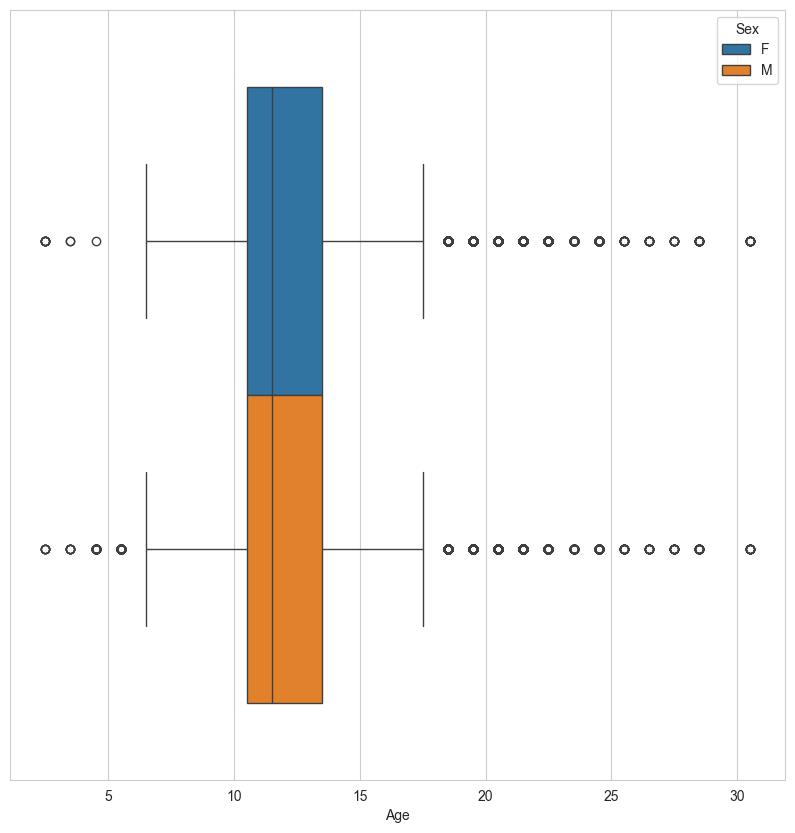

In [21]:
# Do male or females tend to live longer?
df_mf = df[((df['Sex'] == 'M') | (df['Sex'] == 'F'))]
df_mf['Age'] = df_mf['Rings'] + 1.5
plt.figure(figsize=(10,10))
sns.boxplot(data=df_mf,x='Age',hue='Sex')

In [22]:
df_mf.groupby('Sex')['Age'].mean()

# Basically no difference

Sex
F    12.659881
M    12.251160
Name: Age, dtype: float64

In [23]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

# Preprocessing
1. Remove ID
2. One-hot-encode Sex
3. Use XGBoostRegressor or LGBMRegressor


In [51]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, average_precision_score, label_ranking_average_precision_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

In [25]:
def preprocessor(df):
    X = df.copy()

    X = pd.get_dummies(X, columns=['Sex'])
    return X



In [26]:
df_train = df.drop(columns='id').copy()
df_train = preprocessor(df_train)
X = df_train.drop(columns='Rings')
y = df_train['Rings']


In [ ]:
params = {
    
}

In [78]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 900, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.07),
        'max_depth': trial.suggest_int('max_depth', 6, 10),
        'lambda_l2': trial.suggest_float('lambda_l2', 10, 14),
        'random_state': 42,
        'verbose': -1,  
        'device_type':'GPU'
    }


    model_lgbm = LGBMRegressor(**params)
    def rmsle(y_true, y_pred):

        y_pred = np.clip(y_pred, 0, None)
        y_true = np.clip(y_true, 0, None)
        
        log_diff = np.log1p(y_pred) - np.log1p(y_true)
        return np.sqrt(np.mean(log_diff ** 2))
    
    scorer = make_scorer(rmsle)
    
    scores = cross_val_score(estimator=model_lgbm,cv=8,X=X,y=y, scoring=scorer)
    
    return scores.mean()
        

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=200)

[I 2025-06-18 14:24:43,855] A new study created in memory with name: no-name-7f262fb6-6fe9-4b1a-9347-39988320b19a
[I 2025-06-18 14:25:33,512] Trial 0 finished with value: 0.1496978726930961 and parameters: {'n_estimators': 1125, 'learning_rate': 0.06802857225639666, 'max_depth': 9, 'lambda_l2': 12.394633936788146}. Best is trial 0 with value: 0.1496978726930961.
[I 2025-06-18 14:26:12,199] Trial 1 finished with value: 0.1496043345048081 and parameters: {'n_estimators': 993, 'learning_rate': 0.03623978081344811, 'max_depth': 6, 'lambda_l2': 13.46470458309974}. Best is trial 1 with value: 0.1496043345048081.
[I 2025-06-18 14:26:59,585] Trial 2 finished with value: 0.14947567088285507 and parameters: {'n_estimators': 1261, 'learning_rate': 0.05832290311184182, 'max_depth': 6, 'lambda_l2': 13.879639408647977}. Best is trial 2 with value: 0.14947567088285507.
[I 2025-06-18 14:27:53,559] Trial 3 finished with value: 0.149496443428089 and parameters: {'n_estimators': 1400, 'learning_rate': 0.

In [79]:
best_params = study.best_params
best_score = study.best_value

In [80]:
optuna.visualization.plot_param_importances(study)

In [81]:
optuna.visualization.plot_optimization_history(study)

In [82]:
optuna.visualization.plot_parallel_coordinate(study)

In [32]:
import shap

In [83]:
X_final = df_test.drop(columns='id').copy()
X_final = pd.get_dummies(X_final,columns=['Sex'])

In [84]:
model_final = LGBMRegressor(**best_params)
model_final.fit(X,y)
y_pred = model_final.predict(X_final)

In [92]:
explainer = shap.TreeExplainer(model_final)


In [93]:
X_sample = X.sample(10)

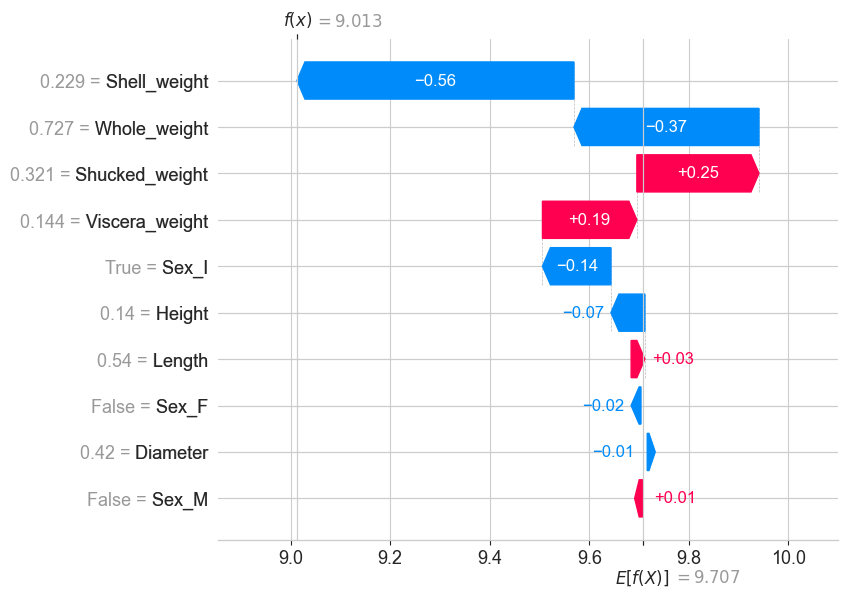

In [102]:
i = 1
shap_values = explainer(X.sample(50))
shap.plots.waterfall(shap_values[i])


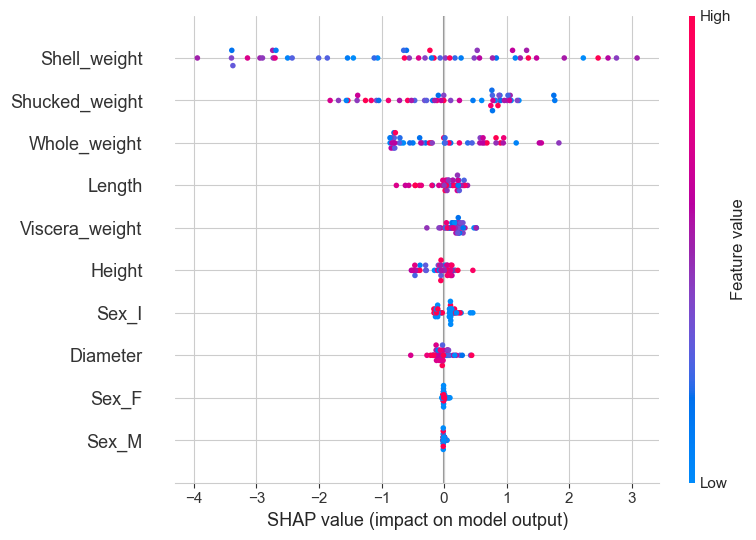

In [111]:
shap.summary_plot(shap_values,X.sample(50))

In [86]:
df_final['Rings'] = y_pred

In [87]:
df_final.head(3)

,id,Rings
0,90615,9.772636
1,90616,9.703704
2,90617,9.890557


In [88]:
df_final.to_csv('submission.csv',index=False)